In [119]:
# 1. import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

In [120]:
# create police_calls dataframe from csv file
police_calls = pd.read_csv('data/police_calls_2018.csv')

In [121]:
# look at first 5 rows
police_calls.head(5)

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,geometry,zipcode,PO
0,PD201800174484,02/16/2018 07:09:00 PM,20180155542,B,93,Traffic Violation,3,CITATION - TRAFFIC,600.0,ALBANY DR,521B,H,23,36.210,-86.600,POINT (-86.59999999999999 36.21),37076,HERMITAGE
1,PD201800174650,02/16/2018 08:02:00 PM,20180155684,B,93,Traffic Violation,9,SUBJECT WARNED,5800.0,OLD HICKORY BLVD,5F34,H,21,36.169,-86.601,POINT (-86.601 36.169),37076,HERMITAGE
2,PD201800175038,02/16/2018 10:16:00 PM,20180156001,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,521B,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE
3,PD201800174217,02/16/2018 05:58:00 PM,20180155321,B,87,Safety Hazard,3,CITATION - TRAFFIC,0.0,MM 221 4 I40 E,5122,H,23,36.170,-86.591,POINT (-86.59100000000001 36.17),37076,HERMITAGE
4,PD201800173907,02/16/2018 04:19:00 PM,20180155047,B,93,Traffic Violation,9,SUBJECT WARNED,1300.0,TULIP GROVE RD,521B,H,23,36.175,-86.596,POINT (-86.596 36.175),37076,HERMITAGE


In [122]:
# look at last 3 rows
police_calls.tail(3)

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,geometry,zipcode,PO
718018,PD201800855208,08/29/2018 09:11:36 AM,20180740194,A,45,Vehicle Accident - Property Damage,1,M.P.D. REPORT COMPLED,6900.0,NOLENSVILLE PKE,3T73,S,31,35.994,-86.685,POINT (-86.685 35.994),37027,BRENTWOOD
718019,PD201800783912,08/08/2018 10:15:20 AM,0,A,43,Want Officer for Investigation / Assistance,11,DISREGARD / SIGNAL 9,0.0,HIGHWAY 70&CHEATHAM CO LINE,NaN,W,25,36.094,-87.038,POINT (-87.038 36.094),37143,PEGRAM
718020,PD201800800491,08/13/2018 11:51:29 AM,20180693242,A,96,Business Check,4,ASSISTED CITIZEN,0.0,HIGHWAY 70&CHEATHAM CO LINE,5252,W,23,36.094,-87.038,POINT (-87.038 36.094),37143,PEGRAM


In [123]:
# 2. how many rows and columns (rows, columns)
police_calls.shape

(718021, 18)

In [124]:
# show all columns in the dataframe. I do this so I can easily copy the column names for the next step
police_calls.columns

Index(['Event Number', 'Call Received', 'Complaint Number', 'Shift', 'Tencode',
       'Tencode Description', 'Disposition Code', 'Disposition Description',
       'Block', 'Street Name', 'Unit Dispatched', 'Sector', 'Zone', 'Latitude',
       'Longitude', 'geometry', 'zipcode', 'PO'],
      dtype='object')

In [125]:
# 3. keep just the specified columns (drop others)
police_calls = police_calls.drop(columns=['Event Number', 'Complaint Number', 'Block', 'Street Name', 'geometry'])

In [126]:
# 4. rename columns
police_calls = police_calls.rename(columns= {
    'Call Received':'call_time', 
    'Shift':'shift', 
    'Tencode':'tencode', 
    'Tencode Description':'tencode_desc',
    'Disposition Code':'disposition', 
    'Disposition Description':'disposition_desc', 
    'Unit Dispatched':'unit_dispatched',
    'Sector':'sector', 
    'Zone':'zone', 
    'Latitude':'lat', 
    'Longitude':'lng', 
    'zipcode':'zipcode', 
    'PO':'po'
})

In [127]:
# 5. how many different call signs are in the data?
police_calls['unit_dispatched'].nunique()

2477

In [128]:
# 6. which shift had the highest volume of calls?
police_calls['shift'].value_counts().sort_values(ascending=False)

shift
B    278672
A    240728
C    168606
Name: count, dtype: int64

In [129]:
# 7. what are the unique disposition decriptions?
police_calls['disposition_desc'].unique()

array(['CITATION - TRAFFIC', 'SUBJECT WARNED', 'ASSISTED OTHER UNIT',
       'GONE ON ARRIVAL', 'ASSISTED CITIZEN', 'COMMUNITY POLICING',
       'LOCATION/BUILDING SECURE', 'DISREGARD / SIGNAL 9',
       'M.P.D. REPORT COMPLED', 'ADVISED IN CIVIL CASE', 'FALSE CALL',
       'NO RESPONSE', 'ARREST, CUSTODIAL OR CITATION',
       'ASSISTANCE REFUSED', 'ADVISORY / NOTICE FORM GIVEN', nan],
      dtype=object)

In [130]:
# 8(a). remove all rows where disposition description is missing (NaN)
police_calls = police_calls.dropna(subset='disposition_desc')

In [131]:
# 8(b, c). remove rows where disposition description is 'disregard / signal 9' or 'no response'
# use tilde (~) to negate...this means, 'where disposition_desc is not in ...'
police_calls = police_calls.loc[~police_calls.disposition_desc.isin(['DISREGARD / SIGNAL 9', 'NO RESPONSE'])]

In [132]:
# 8(d) make sure you have 624,841 rows remaining
police_calls.shape

(624841, 13)

In [133]:
# 9. create a dataframe from the tencode_desc value counts called tencode_counts
#  reset_index() is needed to conver this from a pandas series to a pandas dataframe
tencode_counts = police_calls['tencode_desc'].value_counts().reset_index()

In [134]:
# rename the columns to tencode_desc and tencode_count
tencode_counts.columns = ['tencode_desc','tencode_count']

In [135]:
# verify the dataframe was created correctly, just look at the first 5 rows
tencode_counts.head(5)

,tencode_desc,tencode_count
0,Business Check,154763
1,Traffic Violation,141283
2,Want Officer for Investigation / Assistance,100465
3,Administrative/Special Assignment,34094
4,Community Policing Activity,34001


<Axes: ylabel='tencode_desc'>

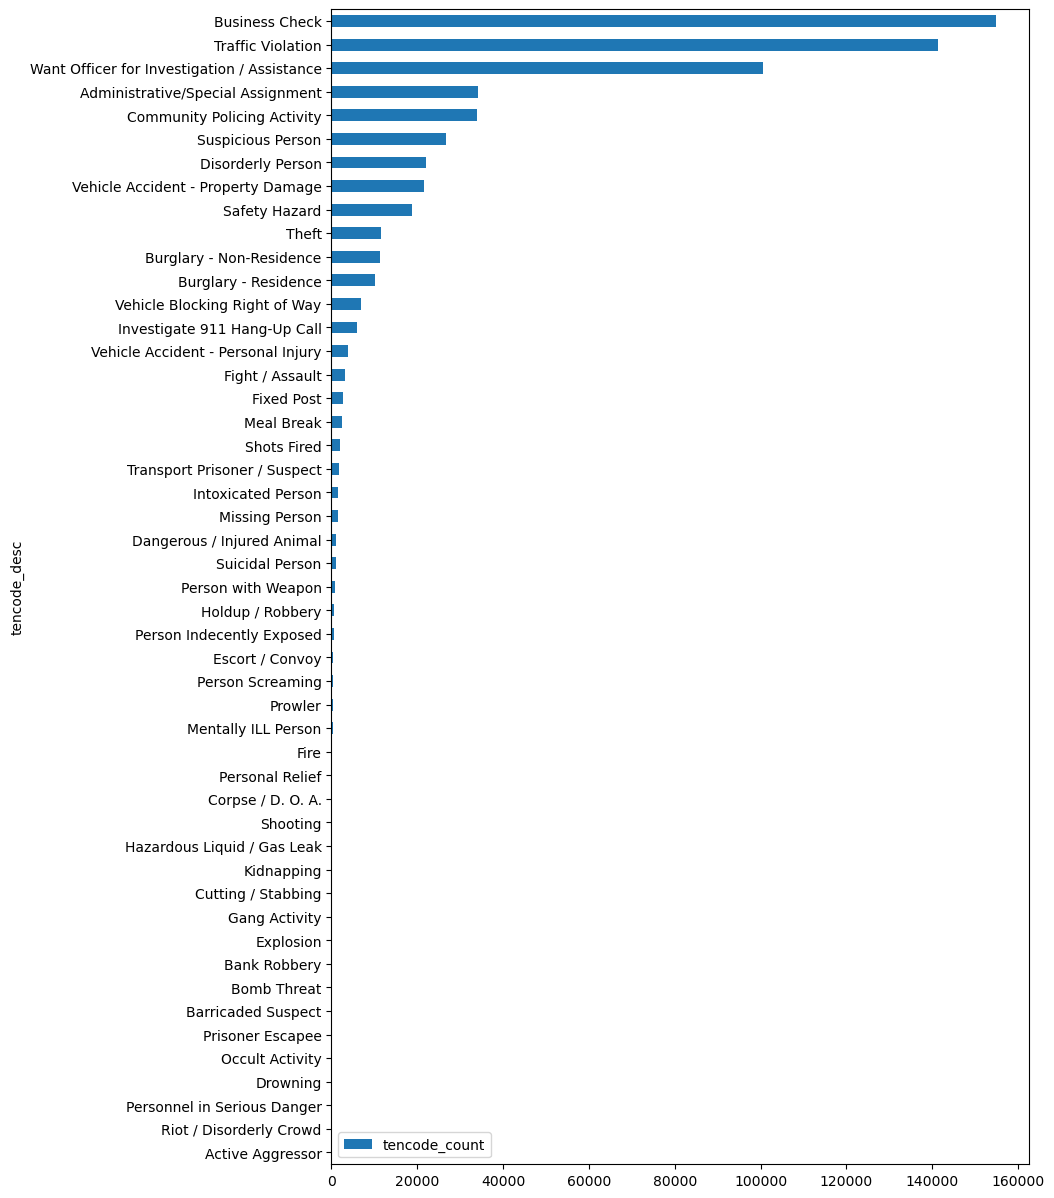

In [136]:
# 10. create a horizontal barplot to show calls by tencode
# I use the sort_values so the largest counts show on top
# play with the figsize values to get all values to show in the plot (this is a long list)
# this is a basic plot using Pandas, Seaborn will help us make a better looking plot
tencode_counts.sort_values('tencode_count').plot(kind = 'barh',
                                                 x = 'tencode_desc',
                                                 y = 'tencode_count',
                                                 figsize = (9,15))

In [137]:
# 11. find the counts of calls by zip code
calls_per_zipcode = police_calls['zipcode'].value_counts().sort_values(ascending=False).reset_index()

In [138]:
# Convert the zipcode column from int (number) to string (categorical)
calls_per_zipcode['zipcode'] = calls_per_zipcode['zipcode'].astype(str)

In [139]:
# verify column type is 'object' (this means the column type in the dataframe is a string)
calls_per_zipcode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   zipcode  38 non-null     object
 1   count    38 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 740.0+ bytes


<Axes: title={'center': 'Calls by Zip Code'}, ylabel='zipcode'>

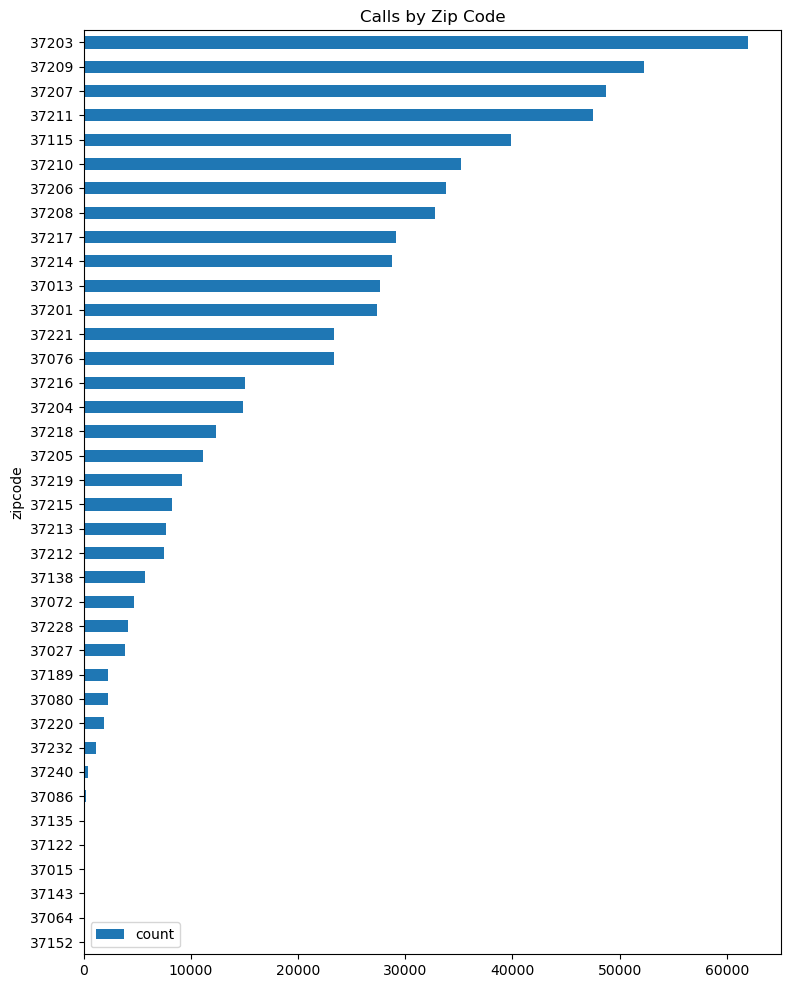

In [140]:
# plot calls per zip code, sort by count so large numbers show first, give it a meaningful title, figsize to show all values
calls_per_zipcode.sort_values('count').plot(kind = 'barh',
                                            x = 'zipcode',
                                            y = 'count',
                                            title = 'Calls by Zip Code',
                                            figsize = (9,12))

In [141]:
# create a separate dataframe of just 'community policing activity' tencode descriptions
# this is an intermediate step and makes it easier and more readable to do the future group by zipcode calculations
cp_police_calls = police_calls.loc[police_calls['tencode_desc'] == 'Community Policing Activity']

In [147]:
cp_police_calls.head()

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po
9,02/16/2018 08:32:00 PM,B,15,Community Policing Activity,15,COMMUNITY POLICING,522B,H,21,36.199,-86.619,37076,HERMITAGE
16,02/16/2018 05:35:00 PM,B,15,Community Policing Activity,12,LOCATION/BUILDING SECURE,2945,H,33,36.157,-86.619,37076,HERMITAGE
27,02/16/2018 03:49:00 PM,B,15,Community Policing Activity,15,COMMUNITY POLICING,522B,H,23,36.199,-86.612,37076,HERMITAGE
47,02/16/2018 04:56:00 PM,B,15,Community Policing Activity,15,COMMUNITY POLICING,522B,H,23,36.214,-86.598,37076,HERMITAGE
78,02/17/2018 12:52:00 PM,A,15,Community Policing Activity,15,COMMUNITY POLICING,511A,H,21,36.194,-86.617,37076,HERMITAGE


In [148]:
community_policing = cp_police_calls['zipcode'].value_counts().reset_index()

In [153]:
# look at the statistics, the community policing zip code counts don't match the overall counts by zip code
community_policing

,zipcode,count
0,37209,6456
1,37203,3920
2,37221,2993
3,37201,2056
4,37206,1895
5,37208,1718
6,37211,1629
7,37210,1501
8,37207,1484
9,37205,1216


In [156]:
police_calls.head(3)

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po
0,02/16/2018 07:09:00 PM,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE
1,02/16/2018 08:02:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE
2,02/16/2018 10:16:00 PM,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE


In [162]:
# 13. convert the call_time column in polic_calls to pandas datetime, specify the format to help the process
police_calls['call_time'] = pd.to_datetime(police_calls['call_time'], format='%m/%d/%Y %I:%M:%S %p')

In [164]:
# create the new column for month to store the month in which the call occurred, verify the results
police_calls['month'] = police_calls['call_time'].dt.month
police_calls.head()

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po,month
0,2018-02-16 19:09:00,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE,2
1,2018-02-16 20:02:00,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE,2
2,2018-02-16 22:16:00,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE,2
3,2018-02-16 17:58:00,B,87,Safety Hazard,3,CITATION - TRAFFIC,5122,H,23,36.170,-86.591,37076,HERMITAGE,2
4,2018-02-16 16:19:00,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE,2


In [174]:
# show calls by month, this data is probably incomplete (why no calls in Oct, Nov, Dec?)
# use the sort_index rather than sort_values so we can sort this by month
police_calls['month'].value_counts().sort_index()

month
1    85094
2    72413
3    79892
4    65953
5    74718
6    73098
7    57558
8    73181
9    42934
Name: count, dtype: int64

In [179]:
# 14. which days of the week get the most calls? I add a column to store the day name for each call
police_calls['day_of_week'] = police_calls['call_time'].dt.day_name()

In [184]:
# Tuesday and Wednesday have the most calls, Saturday and Sunday the least
police_calls['day_of_week'].value_counts().sort_values(ascending=False)

day_of_week
Tuesday      102706
Wednesday    101700
Thursday      97885
Friday        95998
Monday        92536
Saturday      71102
Sunday        62914
Name: count, dtype: int64